# Quantum Gates

In [1]:
from qiskit import QuantumCircuit, assemble, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import array_to_latex
import math

import numpy as np

$ \newcommand{\ket}[1]{\left|{#1}\right\rangle} $
$ \newcommand{\bra}[1]{\left\langle{#1}\right|} $

In this notebook I will show how we can create quantum gates using ket0 and ket1, which are the two Z-basis (standard basis) states for a one qubit system:

$ \ket 0 = $ $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$ \ket 1 = $ $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

In [2]:
ket0 = np.matrix([[1], 
                  [0]])

ket1 =  np.matrix([[0], 
                  [1]])

array_to_latex(ket0)

<IPython.core.display.Latex object>

## Unary Quantum Gates

$ \newcommand{\ket}[1]{\left|{#1}\right\rangle} $
$ \newcommand{\bra}[1]{\left\langle{#1}\right|} $

A linear operator $ U:\mathcal{H}^{\bigotimes n} \to \mathcal{H}^{\bigotimes n}  $ is called unitary if

$  \bra{U\phi} {U\psi \rangle} = \bra{\phi} {\psi \rangle} $

for all $ \ket \phi , \ket \psi \in \mathcal{H}^{\bigotimes n} $

Normally U is represented by a $ 2^n \times 2^n $ complex matrix and U is called a unitary matrix.

A unary quantum gate is a unitary operator

$ U:\mathcal{H} \to \mathcal{H} $

and can be represented by a unitary $ 2 \times 2 $ matrix.


## Identity (I-gate)

I-gate = $ \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $

The identity gate does nothing and leaves the qubit unchanged. It is often used in a circuits when we want to perform operations on some qubits while ensuring others are left unchanged.

## Pauli Gates

The three Pauli gates are the X-gate (also called NOT-gate), Y-gate and Z-gate:

X-gate = $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $

Y-gate = $ \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} $

Z-gate = $ \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $ <br><br>


The X-gate rotates the qubit $ \pi $ radians around the x-axis in the Bloch sphere. The X-gate is often called the "bit-flip"-gate because it will flip $ \ket 0 $ to $ \ket 1 $ and $ \ket 1 $ to $ \ket 0 $:

$ X\ket 0 = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} 
            \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 
            \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \ket 1 $
            
$ X\ket 1 = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} 
            \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 
            \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \ket 0 $
            

The Z-gate rotates the qubit $ \pi $ radians around the z-axis. It is sometimes called the "phase-flip"-gate as it introduces a phase flip between the $ \ket 0 $ and $ \ket 1 $ states. It will flip $ \ket + $ to $ \ket - $ and $ \ket - $ to $ \ket + $:

$ Z\ket + = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \ket - $
            
$ Z\ket - = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \ket + $
            
            
The Y-gate rotates the qubit $ \pi $ radians around the y-axis. It is sometimes called the "bit and phase flip"-gate because it combines both a bit flip operation and a phase flip operation. This will **not** flip $ \ket L $ to $ \ket R $ and visa versa like the X- and Z-gate flips $ \ket 0 $ to $ \ket 1 $, $ \ket + $ to $ \ket - $ etc. Looking at the effect of the Y-gate on $ \ket 0 $ and $ \ket 1 $:

$ Y\ket 0 = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} 
            \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 
            \begin{bmatrix} 0 \\ i \end{bmatrix} = i\ket 1 $
            
            
$ Y\ket 1 = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} 
            \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 
            \begin{bmatrix} -i \\ 0 \end{bmatrix} = -i\ket 0 $
            
            
Here we can see both the bit flip and the phase flip in effect.


## Hadamard Gate (H-gate)

XHadamard-gate = $ \frac{1}{\sqrt 2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $


The Hadamard gate operates on a single qubit and turns the state $ \ket 0 $ or $ \ket 1 $ into a superposition of $ \ket 0 $ and $ \ket 1 $:

$ H\ket 0 = \frac{1}{\sqrt 2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
            \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \ket + $
            
$ H\ket 1 = \frac{1}{\sqrt 2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
            \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \ket - $
            
The Hadamard gate will also turn $ \ket + $ to $ \ket 0 $ and $ \ket - $ to $ \ket 1 $

$ H\ket + = \frac{1}{\sqrt 2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = 
            \frac{1}{2} \begin{bmatrix} 2 \\ 0 \end{bmatrix} = \ket 0 $
            
$ H\ket - = \frac{1}{\sqrt 2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
            \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = 
            \frac{1}{2} \begin{bmatrix} 0 \\ 2 \end{bmatrix} = \ket 1 $
            
            
## T and S-Gate

T- and S-gate are phase shift gates. They shift the phase of a qubit $ \frac{\pi}{4} $ and $ \frac{\pi}{2} $ respectively. 

T-gate = $ \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi / 4} \end{bmatrix} $

S-gate = $ \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi / 2} \end{bmatrix} $

In [3]:
def Xgate():
    return np.outer(ket0, ket1.getH()) + np.outer(ket1, ket0.getH())

def Ygate():
    return np.complex64(-1j*(np.outer(ket0, ket1.getH())) + 1j*(np.outer(ket1, ket0.getH())))

def Zgate():
    return np.outer(ket0, ket0.getH()) - np.outer(ket1, ket1.getH())

def Hadamard():
    return (1/np.sqrt(2))* (
           np.outer(ket0, ket0.getH()) + np.outer(ket0, ket1.getH())
         + np.outer(ket1, ket0.getH()) - np.outer(ket1, ket1.getH()))


In [4]:
# X-gate
array_to_latex(Xgate())

<IPython.core.display.Latex object>

In [5]:
# Y-gate
array_to_latex(Ygate())

<IPython.core.display.Latex object>

In [6]:
# Z-gate
array_to_latex(Zgate())

<IPython.core.display.Latex object>

In [7]:
# Hadamard-gate
array_to_latex(Hadamard())

<IPython.core.display.Latex object>

## Binary Quantum Gates

Binary quantum gate can be represented as a unitary 4x4 matrix. Some important binary gates are:

CX-gate = $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                            0 & 1 & 0 & 0 \\
                            0 & 0 & 0 & 1 \\
                            0 & 0 & 1 & 0 \end{bmatrix} $

CY-gate = $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                            0 & 1 & 0 & 0 \\ 
                            0 & 0 & 0 & -i \\
                            0 & 0 & i & 0 \end{bmatrix} $
                            
CZ-gate = $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                            0 & 1 & 0 & 0 \\
                            0 & 0 & 1 & 0 \\
                            0 & 0 & 0 & -1 \end{bmatrix} $
                            
CU-gate = $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                            0 & 1 & 0 & 0 \\
                            0 & 0 & u_1 & u_2 \\
                            0 & 0 & u_3 & u_4 \end{bmatrix} $

Swap-gate = $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \end{bmatrix} $
                              
                              
A control gate operates on two or more qubits (two for the binary quantum gates, but we can extend the gates to n-ary gates). For the binary control gates the first qubit acts as the control qubit and the second qubit is the target qubit. For any CU-gate the state of the control qubit determines if U is applied to the target qubit. If the control qubit is in the state $ \ket0 $, then nothing happens. If the control qubit is in the state $ \ket1 $, then U is applied to the target qubit. It is important to note that the control qubit may change aswell. 

CU-gate are the general version of the control-gates. We can use any unary gate U, where

U = $ \begin{bmatrix} u_1 & u_2 \\ u_3 & u_4 \end{bmatrix} $


If we want to reverse the order of the control and target qubit, we can use the reverse-CU-gate. This can be constructed by $ Swap * CU * Swap $. For example the CX-gate can will be:

CX-reverse = $ \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & 0 & 1 & 0 \\
                                0 & 1 & 0 & 0 \\
                                0 & 0 & 0 & 1 \end{bmatrix}
               \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & 1 & 0 & 0 \\
                                0 & 0 & 0 & 1 \\
                                0 & 0 & 1 & 0 \end{bmatrix}                
               \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & 0 & 1 & 0 \\
                                0 & 1 & 0 & 0 \\
                                0 & 0 & 0 & 1 \end{bmatrix} =               
               \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & 0 & 0 & 1 \\
                                0 & 0 & 1 & 0 \\
                                0 & 1 & 0 & 0 \end{bmatrix} $
                              
                              
More generally we have that:

CX-reverse = $ \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & 0 & 1 & 0 \\
                                0 & 1 & 0 & 0 \\
                                0 & 0 & 0 & 1 \end{bmatrix}
               \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & 1 & 0 & 0 \\
                                0 & 0 & u_1 & u_2 \\
                                0 & 0 & u_3 & u_4 \end{bmatrix} 
               \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & 0 & 1 & 0 \\
                                0 & 1 & 0 & 0 \\
                                0 & 0 & 0 & 1 \end{bmatrix} =    
               \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                                0 & u_1 & 0 & u_2 \\
                                0 & 0 & 1 & 0 \\
                                0 & u_3 & 0 & u_4 \end{bmatrix} $

## Creating CU-gates

In [8]:
def CUgate(U):
    """
    Input: 2x2 unary matrix
    Return: CU-gate (4x4 matrix)
    """
    
    I = np.eye(2)
    return np.kron(np.outer(ket0, ket0.getH()), I) + np.kron(np.outer(ket1, ket1.getH()), U)

def Swapgate():
    basis0 = np.kron(ket0, ket0)
    basis1 = np.kron(ket0, ket1)
    basis2 = np.kron(ket1, ket0)
    basis3 = np.kron(ket1, ket1)
    
    return np.outer(basis0, basis0.getH()) + np.outer(basis3, basis3.getH()) + np.outer(basis1, basis2.getH()) + np.outer(basis2, basis1.getH())

def ReverseCUgate(CU):
    return np.matmul(np.matmul(Swapgate(), CU), Swapgate())

In [9]:
# Swap-gate
array_to_latex(Swapgate())

<IPython.core.display.Latex object>

In [10]:
# CX-gate
array_to_latex(CUgate(Xgate()))

<IPython.core.display.Latex object>

In [11]:
# CX-reverse
array_to_latex(ReverseCUgate(CUgate(Xgate())))

<IPython.core.display.Latex object>

## Bell States

There are four Bell states and they are all entangled. Entangled means that they cannot be decomposed into a tensor product of two single qubit states. Instead a Bell state is a combined pure state that describe both qubits together. The four Bell states create a orthonormal basis in $ \mathcal{H}^{\bigotimes 2} $ 

$ \ket{\Phi^+} := \frac{1}{\sqrt 2} (\ket{00} + \ket{11}) $

$ \ket{\Phi^-} := \frac{1}{\sqrt 2} (\ket{00} - \ket{11}) $

$ \ket{\Psi^+} := \frac{1}{\sqrt 2} (\ket{01} + \ket{10}) $

$ \ket{\Psi^-} := \frac{1}{\sqrt 2} (\ket{01} - \ket{10}) $


## Implementing the Bell States

Starting with a two qubit system where both qubits are in the state $ \ket0 $, we can apply quantum gates to get the Bell states. To visualize what we do we can create a quantum circuit that describe the operations we do. Here I will use qiskit to create the circuits.

In [12]:
# Helper function to apply the circuit to the system
def GetStateVector(qc):

    #Save the state vector
    qc.save_statevector()

    #Execute & get result
    job = execute(qc, backend)
    job_result = job.result()

    #Return state vector
    return job_result.get_statevector(qc)

## $ \ket{\Phi^+} $

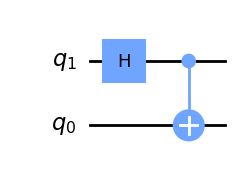

In [13]:
#Get backend
backend = QasmSimulator()

# Create a QuantumCircuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Quantum Gates
qc.h(1)
qc.cx(1, 0)

#Display circuit
qc.draw('mpl', reverse_bits=True)

In [14]:
# Print the state
array_to_latex(GetStateVector(qc))

<IPython.core.display.Latex object>

## $ \ket{\Phi^-} $

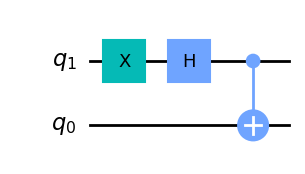

In [15]:
# Create a QuantumCircuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Quantum Gates
qc.x(1)
qc.h(1)
qc.cx(1, 0)

#Display circuit
qc.draw('mpl', reverse_bits=True)

In [16]:
# Print the state
array_to_latex(GetStateVector(qc))

<IPython.core.display.Latex object>

## $ \ket{\Psi^+} $

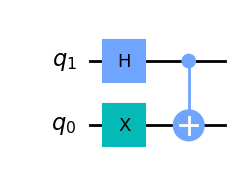

In [17]:
# Create a QuantumCircuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Quantum Gates
qc.x(0)
qc.h(1)
qc.cx(1, 0)

#Display circuit
qc.draw('mpl', reverse_bits=True)

In [18]:
# Print the state
array_to_latex(GetStateVector(qc))

<IPython.core.display.Latex object>

## $ \ket{\Psi^-} $

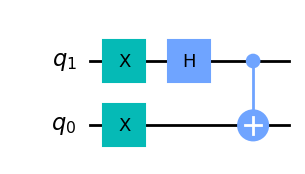

In [19]:
# Create a QuantumCircuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Quantum Gates
qc.x(0)
qc.x(1)
qc.h(1)
qc.cx(1, 0)

#Display circuit
qc.draw('mpl', reverse_bits=True)

In [20]:
# Print the state
array_to_latex(GetStateVector(qc))

<IPython.core.display.Latex object>